In [1]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/55/d5/0a1c65b13ab5a24178d162d0cfd3f8a709588388cc5bdd32b17c119f6d54/shap-0.44.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.0/446.0 kB 10.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/76/e8/260752c1bc8dc856b27cfefaa3fca29ba02a15f649bbf6e9c15ed54e5480/xgboost-2.0.2-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing packages
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests                                      # reading data
from io import StringIO

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss as J01
from sklearn.preprocessing import OneHotEncoder
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import sklearn.tree as tree

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)  

In [32]:
pip install --upgrade imbalanced-learn scikit-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/40/c6/2e91eefb757822e70d351e02cc38d07c137212ae7c41ac12746415b4860a/scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 15.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need

In [4]:
# Reading in the CSV file
Xtr = pd.read_csv("data/X_TRAINING_SET_Diabetes_ENCODED.csv")
Ytr = pd.read_csv("data/Y_TRAINING_SET.csv")
Xtr = Xtr.drop(columns=['Unnamed: 0'])
                 
Xtest = pd.read_csv("data/X_VALIDATION_SET_ENCODED.csv")
Ytest = pd.read_csv("data/Y_VALIDATION_SET.csv")
Xtest = Xtest.drop(columns=['Unnamed: 0'])




In [1]:
from imblearn.combine import SMOTEENN


In [5]:
Ytr['readmitted'] = Ytr['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})
Ytest['readmitted'] = Ytest ['readmitted'].map({'<30': 1, 'NO': 0, '>30': 2})


In [7]:
Ytr=Ytr.iloc[:,1:]

In [8]:
sme = SMOTEENN(random_state=42)
X_tr_bal, y_tr_bal = sme.fit_resample(Xtr, Ytr)

In [12]:
y_tr_bal.to_csv('data/Y_TRAINING_SET_EDIT.csv', index=False)
Ytest.to_csv('data/Y_VALIDATION_SET_EDIT.csv', index=False)

In [13]:
from sklearn.ensemble import AdaBoostClassifier


cls = AdaBoostClassifier()

cls.fit(X_tr_bal, y_tr_bal)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


AdaBoostClassifier()

In [14]:
y_tr_bal.shape

(28124, 1)

Top 5 Features:
gender_Male: 0.1200
gender_Female: 0.1000
patient_nbr: 0.1000
number_inpatient: 0.0800
change_No: 0.0800


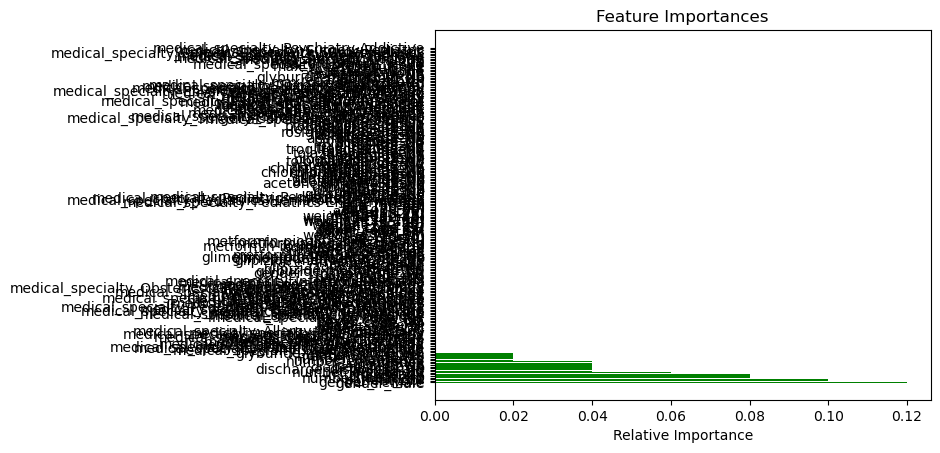

In [15]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = Xtr.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [16]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')


Top 25 Features:
gender_Male: 0.1200
gender_Female: 0.1000
patient_nbr: 0.1000
number_inpatient: 0.0800
change_No: 0.0800
change_Ch: 0.0800
insulin_Steady: 0.0600
number_outpatient: 0.0400
insulin_No: 0.0400
discharge_disposition_id: 0.0400
diabetesMed_No: 0.0400
insulin_Down: 0.0400
insulin_Up: 0.0400
index: 0.0400
number_emergency: 0.0200
number_diagnoses: 0.0200
encounter_id: 0.0200
metformin_Steady: 0.0200
diabetesMed_Yes: 0.0200
glyburide-metformin_Down: 0.0000
payer_code_MC: 0.0000
medical_specialty_Gastroenterology: 0.0000
medical_specialty_Family/GeneralPractice: 0.0000
medical_specialty_Endocrinology-Metabolism: 0.0000
medical_specialty_Endocrinology: 0.0000


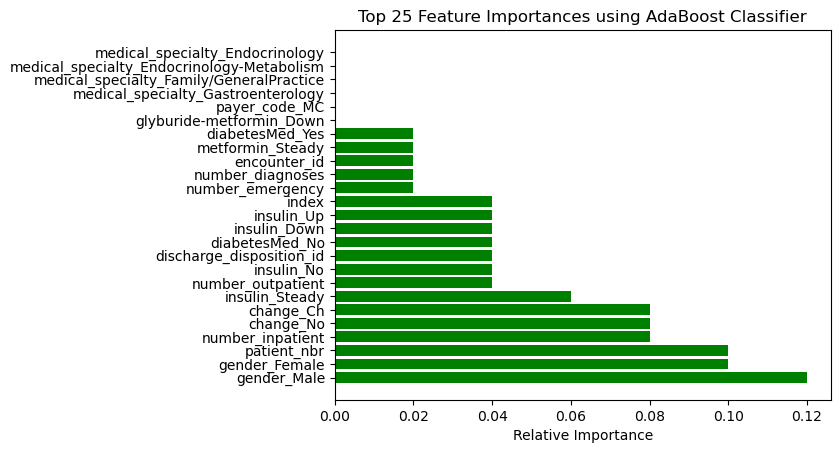

In [17]:
# Plot the bar chart for the top n importances
plt.title(f'Top {n} Feature Importances using AdaBoost Classifier')
plt.barh(range(len(top_n_indices)), top_n_importances, color='g', align='center')
plt.yticks(range(len(top_n_indices)), [features[i] for i in top_n_indices])
plt.xlabel('Relative Importance')
plt.show()


In [20]:
# Select only the top n features in Xtr
Xtr_top_n_adaboost = X_tr_bal[top_n_features]



In [21]:
Xtr_top_n_adaboost

,gender_Male,gender_Female,patient_nbr,number_inpatient,change_No,change_Ch,insulin_Steady,number_outpatient,insulin_No,discharge_disposition_id,...,number_diagnoses,encounter_id,metformin_Steady,diabetesMed_Yes,glyburide-metformin_Down,payer_code_MC,medical_specialty_Gastroenterology,medical_specialty_Family/GeneralPractice,medical_specialty_Endocrinology-Metabolism,medical_specialty_Endocrinology
0,0,1,3.850798e+07,0.000000,1,0,0,0.000000,1,1.000000,...,9.000000,3.913462e+08,0,0,0,1,0,0,0,0
1,1,0,2.491020e+06,1.000000,1,0,0,0.000000,1,18.000000,...,7.000000,4.623627e+07,0,0,0,1,0,0,0,0
2,0,1,2.361438e+06,0.000000,1,0,1,0.000000,0,1.000000,...,9.000000,1.648744e+08,0,1,0,1,0,0,0,0
3,0,1,5.997803e+07,1.000000,0,1,0,0.000000,1,3.000000,...,9.000000,1.863884e+08,0,1,0,0,0,0,0,0
4,0,1,4.151916e+06,0.000000,1,0,0,0.000000,1,1.000000,...,6.000000,1.920240e+07,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28119,0,1,5.659423e+07,0.000000,0,0,0,3.506860,0,2.253430,...,9.000000,1.076482e+08,0,1,0,1,0,0,0,0
28120,1,0,1.142126e+07,1.763230,0,0,0,0.000000,0,1.000000,...,9.000000,1.795524e+08,0,0,0,0,0,0,0,0
28121,0,0,2.775029e+05,0.000000,0,0,0,0.000000,0,25.000000,...,4.450472,2.875671e+06,0,1,0,1,0,0,0,0
28122,0,1,4.314942e+07,0.551484,0,1,0,0.000000,0,1.000000,...,5.654453,1.725120e+08,0,1,0,1,0,0,0,0


In [23]:
Xtr_top_n_adaboost.to_csv('/users/abhinandganesh/Desktop/Xtr_Feature_Selected.csv')


# Random Forest

In [35]:

cls=RandomForestClassifier()

In [36]:
X_tr_bal.columns

Index(['index', 'encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=213)

In [37]:
cls.fit(X_tr_bal, y_tr_bal)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier()

Top 5 Features:
patient_nbr: 0.0771
index: 0.0644
encounter_id: 0.0637
number_inpatient: 0.0606
num_medications: 0.0509


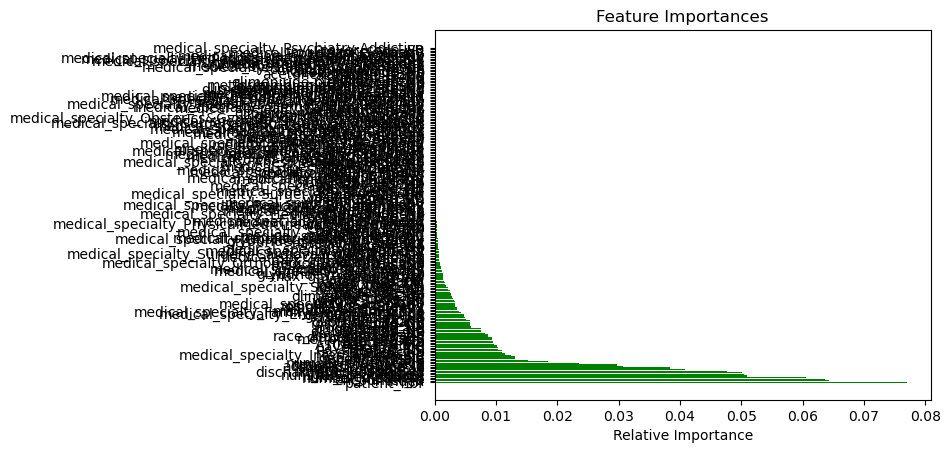

In [38]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance
features = Xtr.columns

n = 5  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')

# Plot the bar chart
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [39]:
n = 25  # You can change this to the desired number of features
top_n_indices = indices[:n]
top_n_features = [features[i] for i in top_n_indices]
top_n_importances = importances[top_n_indices]

print(f'Top {n} Features:')
for feature, importance in zip(top_n_features, top_n_importances):
    print(f'{feature}: {importance:.4f}')


Top 25 Features:
patient_nbr: 0.0771
index: 0.0644
encounter_id: 0.0637
number_inpatient: 0.0606
num_medications: 0.0509
num_lab_procedures: 0.0505
time_in_hospital: 0.0501
discharge_disposition_id: 0.0477
number_diagnoses: 0.0408
num_procedures: 0.0384
admission_type_id: 0.0307
admission_source_id: 0.0297
number_outpatient: 0.0236
number_emergency: 0.0186
insulin_Steady: 0.0152
gender_Male: 0.0132
gender_Female: 0.0131
insulin_No: 0.0125
medical_specialty_InternalMedicine: 0.0114
race_Caucasian: 0.0110
change_No: 0.0110
age_[70-80): 0.0104
change_Ch: 0.0103
payer_code_MC: 0.0101
A1Cresult_None: 0.0096


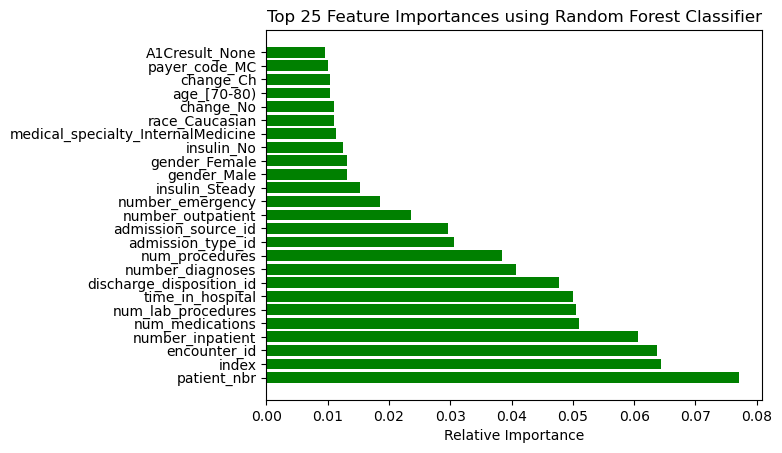

In [40]:
# Plot the bar chart for the top n importances
plt.title(f'Top {n} Feature Importances using Random Forest Classifier')
plt.barh(range(len(top_n_indices)), top_n_importances, color='g', align='center')
plt.yticks(range(len(top_n_indices)), [features[i] for i in top_n_indices])
plt.xlabel('Relative Importance')
plt.show()


In [41]:
Xtr_top_n_rf = X_tr_bal[top_n_features]


In [43]:
Xtr_top_n_rf.to_csv('/users/abhinandganesh/Desktop/Xtr_Feature_Selected_rf.csv')


In [45]:
import pandas as pd

# Assuming Xtr_top_n_rf and Xtr_top_n_adaboost are your DataFrames

# Identify common columns
common_columns = list(set(Xtr_top_n_rf.columns) & set(Xtr_top_n_adaboost.columns))

# Create a dataset with common columns
common_dataset = pd.merge(Xtr_top_n_rf[common_columns], Xtr_top_n_adaboost[common_columns], left_index=True, right_index=True)

# Display the common dataset
print(common_dataset)


       change_No_x  index_x  change_Ch_x  gender_Male_x  patient_nbr_x  \
0                1    97653            0              0   3.850798e+07   
1                1    11090            0              1   2.491020e+06   
2                1    58004            0              0   2.361438e+06   
3                0    66644            1              0   5.997803e+07   
4                1     3013            0              0   4.151916e+06   
...            ...      ...          ...            ...            ...   
28119            0    34375            0              0   5.659423e+07   
28120            0    64528            0              1   1.142126e+07   
28121            0      250            0              0   2.775029e+05   
28122            0    61863            1              0   4.314942e+07   
28123            0    72182            0              1   1.102469e+08   

       insulin_No_x  number_diagnoses_x  number_outpatient_x  gender_Female_x  \
0                 1           

In [50]:
common_dataset.to_csv('data/XTR_SMOTEEN+FEATURE_SELECTION.csv')

In [51]:
y_tr_bal.to_csv('data/YTR_SMOTEEN_FEATURE_SELECTION.csv')